### Categorical Data Drift in AI Models Using Population Stability Index (PSI)

**Introduction**  
Categorical data drift occurs when the distribution of categorical variables changes over time between different datasets, such as the training and production datasets. Monitoring this drift is crucial in AI and machine learning models to ensure that the model's predictions remain accurate and relevant as data evolves.

**Population Stability Index (PSI)**  
The Population Stability Index (PSI) is a statistical measure used to identify and quantify data drift. PSI is particularly useful for categorical variables where the occurrence of certain categories (or modalities) might shift over time. PSI can help identify these shifts by comparing the distribution of a categorical variable in the training data with the distribution in the test or production data.

A high PSI value indicates that the variable has drifted significantly, which can lead to model performance degradation. The PSI calculation involves comparing the frequency distribution of each category between the training and test datasets and computing a score to assess the level of drift.

**How PSI Works**  
PSI is computed by comparing the proportion of each category in the training dataset against the test dataset. The formula for calculating PSI is:

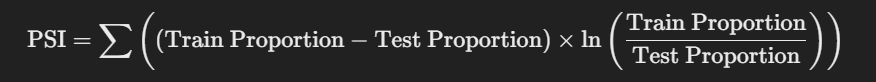

Where:
- **Train Proportion** is the proportion of observations in each category in the training dataset.
- **Test Proportion** is the proportion of observations in each category in the test dataset.

**PSI Thresholds:**
- **PSI < 0.1**: Little or no change.
- **0.1 ≤ PSI < 0.25**: Moderate change.
- **PSI ≥ 0.25**: Major shift, indicating significant drift.

**Example Application:**
Imagine you have an AI model built on customer transaction data where one of the categorical variables is "Transaction Type" (e.g., "Online", "In-store", "Mobile"). Over time, as more people adopt mobile transactions, the distribution of this variable might shift. By calculating the PSI, we can detect when the model might need to be retrained due to this shift in behavior.

### Practical Implementation of PSI for Categorical Data Drift

To monitor and test data drift in categorical variables using PSI, the following steps can be implemented in Python:

1. **Load the Data**: Import the training and test datasets, focusing on the categorical variable you wish to monitor.
2. **Calculate PSI**: Use a predefined function to calculate the PSI between the two datasets.
3. **Interpret Results**: Based on the PSI value, decide if the variable has drifted and whether any action is needed.

Here’s a general-purpose Python function for calculating PSI for categorical variables:

```python
from collections import Counter
import pandas as pd
import numpy as np

def drift_psi(var_train: pd.Series, var_test: pd.Series, max_num_categories: int = 10):
    min_distribution_probability = 0.0001
    all_modalities = list(set(var_train).union(set(var_test)))
    
    # Handling categories
    if len(all_modalities) > max_num_categories:
        var_count_train = dict(Counter(var_train).most_common(max_num_categories))
        var_count_train['Other'] = len(var_train) - sum(var_count_train.values())
        var_count_test = dict(Counter(var_test))
    else:
        var_count_train = Counter(var_train)
        var_count_test = Counter(var_test)
    
    # Calculate proportions
    train_distribution = np.array([var_count_train.get(i, 0) for i in all_modalities]) / len(var_train)
    test_distribution = np.array([var_count_test.get(i, 0) for i in all_modalities]) / len(var_test)
    
    # Compute PSI
    psi = 0
    for i in range(len(all_modalities)):
        train_dist_bounded = max(train_distribution[i], min_distribution_probability)
        test_dist_bounded = max(test_distribution[i], min_distribution_probability)
        psi += (train_dist_bounded - test_dist_bounded) * np.log(train_dist_bounded / test_dist_bounded)
    
    return psi

# Example usage
train_data = pd.Series(['A', 'B', 'A', 'B', 'C', 'A', 'A', 'B', 'C', 'A'])
test_data = pd.Series(['A', 'B', 'A', 'C', 'A', 'D', 'A', 'B', 'D', 'A'])

psi_value = drift_psi(train_data, test_data)
print(f"PSI Value: {psi_value}")
```

**Interpreting PSI Results:**
The `drift_psi` function will output a PSI score:
- If the score is below 0.1, the drift is minimal.
- If the score is between 0.1 and 0.25, moderate drift has occurred, which may indicate a need to monitor further.
- If the score is above 0.25, major drift has been detected, and the model may require retraining.



Categorical data drift can negatively impact the performance of AI models, leading to inaccurate predictions. Using the PSI as a monitoring tool can help identify when a model might need to be retrained or recalibrated. This ensures the model continues to perform well in a dynamic environment where data distributions may change over time.

In [ ]:
from collections import Counter
import pandas as pd
import numpy as np

def drift_psi(var_train: pd.Series, var_test: pd.Series, max_num_categories: int = 10):
    min_distribution_probability = 0.0001
    all_modalities = list(set(var_train).union(set(var_test)))

    # Handling categories
    if len(all_modalities) > max_num_categories:
        var_count_train = dict(Counter(var_train).most_common(max_num_categories))
        var_count_train['Other'] = len(var_train) - sum(var_count_train.values())
        var_count_test = dict(Counter(var_test))
    else:
        var_count_train = Counter(var_train)
        var_count_test = Counter(var_test)

    # Calculate proportions
    train_distribution = np.array([var_count_train.get(i, 0) for i in all_modalities]) / len(var_train)
    test_distribution = np.array([var_count_test.get(i, 0) for i in all_modalities]) / len(var_test)

    # Compute PSI
    psi = 0
    for i in range(len(all_modalities)):
        train_dist_bounded = max(train_distribution[i], min_distribution_probability)
        test_dist_bounded = max(test_distribution[i], min_distribution_probability)
        psi += (train_dist_bounded - test_dist_bounded) * np.log(train_dist_bounded / test_dist_bounded)

    return psi

# Example usage
train_data = pd.Series(['A', 'B', 'A', 'B', 'C', 'A', 'A', 'B', 'C', 'A'])
test_data = pd.Series(['A', 'B', 'A', 'C', 'A', 'D', 'A', 'B', 'D', 'A'])

psi_value = drift_psi(train_data, test_data)
print(f"PSI Value: {psi_value}")


PSI Value: 1.6292816305292734


Since the PSI value is 1.629, it is well above 0.2, meaning that there is a significant change in the distribution between the training and test datasets.

Actions to Consider:
Investigate the Drift: Identify which categories are contributing the most to this drift.
Update the Model: Consider updating or retraining your model with the new data, as the significant drift could degrade the model's performance.
Feature Engineering: Adjust features if needed, based on how the distribution of data has shifted.



---



---



### Categorical Data Drift Detection Using Chi-Square Test

#### **Introduction**
The chi-square test is a statistical method used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories. It is commonly used in machine learning to detect data drift, especially in categorical variables. In the context of AI and machine learning models, categorical data drift occurs when the distribution of categorical variables changes over time between training and test datasets, potentially leading to performance degradation of the model.

The chi-square test checks whether the categorical distribution in the test data matches the distribution in the training data. The null hypothesis of the chi-square test assumes that there is no significant difference between the distributions, meaning no data drift. If the null hypothesis is rejected, this suggests that the data has drifted.

#### **Chi-Square Test Explanation**
The chi-square statistic is calculated as:

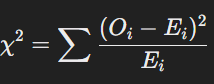

Where:
- Oi = observed frequency in the test dataset.
- Ei = expected frequency in the training dataset.

The chi-square test then returns a p-value, which indicates the likelihood that the observed frequencies differ from the expected frequencies by chance alone. If the p-value is below a specified threshold (e.g., 0.05), the data is considered to have drifted.

#### **How to Use Chi-Square Test for Data Drift Detection:**
1. **Load the Data**: Load the categorical data from both the training and test datasets.
2. **Compute Frequencies**: Calculate the frequency of each category in both datasets.
3. **Run Chi-Square Test**: Compare the frequencies using the chi-square formula.
4. **Interpret Results**: If the chi-square test statistic is significant (p-value < threshold), the data has drifted.


#### **Explanation:**
1. **drift_chisquare function**: Calculates the chi-square statistic by comparing the frequency distributions of categories between the train and test datasets.
2. **test_drift_chisquare function**: Tests if data drift exists by comparing the p-value against a significance level (e.g., 0.05). If the p-value is lower, it indicates significant drift, and the function raises an error.

#### **Interpretation:**
- If the p-value is **greater than** the threshold (e.g., 0.05), the null hypothesis cannot be rejected, implying no significant drift.
- If the p-value is **less than** the threshold, the null hypothesis is rejected, meaning the data has drifted, and the model may require retraining.



The chi-square test is a powerful tool for identifying and quantifying data drift in categorical variables. It helps monitor the distributional changes that can occur between training and production datasets, ensuring the model's reliability over time. Regular drift monitoring is crucial in AI and machine learning to maintain model accuracy and performance.

In [ ]:
from collections import Counter
import pandas as pd
import numpy as np
from scipy.stats import chi2

def drift_chisquare(var_train: pd.Series, var_test: pd.Series, max_num_categories: int = 10, epsilon=1e-6):
    """
    Compute one-way chi-square test (Goodness of fit test) for a categorical variable between a train and test datasets.
    The Null hypothesis is that the categorical variable in the test dataset has the same distribution as in train dataset.

    Parameters
    ----------
    var_train: pd.Series
        A categorical column in the train dataset.
    var_test: pd.Series
        A categorical column in the test dataset that is compared to var_train.
    max_num_categories: int = 10
        Maximum number of categories/modalities.
    epsilon: float
        Small constant added to avoid division by zero.

    Returns
    -------
    chi_square: float
        The chi-squared test statistic.
    pvalue: float
        The p-value of the test.
    output_data: pd.DataFrame
        DataFrame with frequencies and chi-square contributions for each modality.
    """
    all_modalities = list(set(var_train).union(set(var_test)))

    if max_num_categories is not None and len(all_modalities) > max_num_categories:
        var_count_train = dict(Counter(var_train).most_common(max_num_categories))
        var_count_train['Other modalities'] = len(var_train) - sum(var_count_train.values())
        categories_list = list(var_count_train.keys())

        var_count_test = Counter(var_test)
        var_count_test = {i: var_count_test[i] for i in categories_list}  # For test data, take same category names as train_data
        var_count_test['Other modalities'] = len(var_test) - sum(var_count_test.values())

    else:
        var_count_train = Counter(var_train)
        var_count_test = Counter(var_test)

    train_frequencies = np.array([var_count_train.get(i, 0) for i in all_modalities])
    test_frequencies = np.array([var_count_test.get(i, 0) for i in all_modalities])

    chi_square = 0
    output_data = pd.DataFrame(columns=["Modality", "Train_frequencies", "Test_frequencies", "Chi_square"])
    k_norm = var_test.shape[0] / var_train.shape[0]  # Normalize train_frequencies so that train and test are the same size.

    for i in range(len(all_modalities)):
        # Add epsilon to avoid division by zero errors
        train_f = train_frequencies[i] * k_norm
        test_f = test_frequencies[i]
        if train_f > 0:  # Ensure we only calculate chi-square for non-zero train frequencies
            chi_square_value = (test_f - train_f) ** 2 / (train_f + epsilon)
        else:
            chi_square_value = test_f ** 2 / epsilon  # If train_f is 0, account for missing category

        chi_square += chi_square_value

        row = {
            "Modality": all_modalities[i],
            "Train_frequencies": train_frequencies[i],
            "Test_frequencies": test_frequencies[i],
            "Chi_square": chi_square_value
        }

        output_data = pd.concat([output_data, pd.DataFrame([row])], ignore_index=True)  # Using pd.concat instead of append

    pvalue = 1 - chi2.cdf(chi_square, len(all_modalities) - 1)  # Chi-square test p-value.

    return chi_square, pvalue, output_data.sort_values("Chi_square", ascending=False)

# Test that a variable is not drifting
def test_drift_chisquare(var_train: pd.Series, var_test: pd.Series, max_num_categories: int = 10, chisquare_risk_level: float = 0.05, modality_chisquare_contribution: float = 0.2):
    chi_square, pvalue, chisquare_dataset = drift_chisquare(var_train=var_train, var_test=var_test, max_num_categories=max_num_categories)
    main_drifting_modalities_bool = chisquare_dataset["Chi_square"] > modality_chisquare_contribution * chi_square
    modalities_list = chisquare_dataset[main_drifting_modalities_bool]["Modality"].tolist()
    assert pvalue > chisquare_risk_level, f"The variable {var_train.name} is drifting for the following modalities {*modalities_list,}"

# Example Usage:
train_data = pd.Series(['A', 'A', 'B', 'B', 'C', 'A', 'B', 'C', 'A', 'A'])
test_data = pd.Series(['A', 'B', 'A', 'C', 'A', 'D', 'A', 'B', 'D', 'A'])

# Run the chi-square test
chi_square, pvalue, result = drift_chisquare(train_data, test_data)
print(f"Chi-Square Value: {chi_square}, P-Value: {pvalue}")
print(result)


Chi-Square Value: 4000000.833332972, P-Value: 0.0
  Modality Train_frequencies Test_frequencies    Chi_square
2        D                 0                2  4.000000e+06
1        C                 2                1  4.999998e-01
3        B                 3                2  3.333332e-01
0        A                 5                5  0.000000e+00


<ipython-input-5-631fda950092>:71: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  output_data = pd.concat([output_data, pd.DataFrame([row])], ignore_index=True)  # Using pd.concat instead of append


This extremely high chi-square value arises from the fact that there is a significant difference between the frequencies in the training and test datasets for some categories.

The large chi-square value and p-value of 0.0 indicate that there is a significant drift in the distribution of categories between the training and test datasets.



---



### Earth Mover’s Distance (EMD) for Categorical Data Drift Detection
EMD is another useful method for identifying distributional changes between two categorical datasets. While PSI is commonly used for categorical drift detection, EMD can offer more detailed insight by measuring the "minimum cost" required to transform one distribution into another.

#### Definition of Earth Mover's Distance (EMD)
The Earth Mover's Distance (EMD) measures the distance between two probability distributions. In this context, it tells you how much the test distribution has drifted away from the training distribution by calculating the cost to "move" one distribution to match the other.

#### Real-World Application of EMD
Consider two categorical variables in a dataset. These variables may represent product sales categories in a retail dataset. We want to compare their distributions between two time periods—say, Q1 and Q2. By using EMD, we can quantify how much the distribution of product sales has changed, providing insights into trends and drift in customer behavior.

In an AI system, this type of data drift could impact a recommendation engine’s performance, leading to less accurate predictions.

Here’s how you might implement EMD using `pyemd`:

### Code Example for EMD:

```python
import numpy as np
from pyemd import emd

# Train and test distributions for a categorical variable
train_distribution = np.array([0.5, 0.3, 0.1, 0.1])  # e.g., category proportions in training
test_distribution = np.array([0.4, 0.2, 0.3, 0.1])   # e.g., category proportions in test

# Distance matrix (Manhattan distance between category indices)
distance_matrix = np.array([[0, 1, 2, 3], [1, 0, 1, 2], [2, 1, 0, 1], [3, 2, 1, 0]])

# Compute Earth Mover's Distance
emd_value = emd(train_distribution, test_distribution, distance_matrix)
print(f"Earth Mover's Distance: {emd_value}")
```

### Interpretation:
- **EMD Value:** The Earth Mover's Distance measures how much one distribution (test) differs from another (train). A high EMD value indicates more drift, while a lower value indicates that the two distributions are more similar.
- **Distance Matrix:** It defines the "cost" of moving probability mass between different categories.



In [ ]:
!pip install pyemd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.6/662.6 kB 10.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
from pyemd import emd

# Example distributions (train and test)
train_distribution = np.array([0.2, 0.3, 0.5])  # Example: train frequencies as percentages
test_distribution = np.array([0.1, 0.6, 0.3])   # Example: test frequencies as percentages

# Distance matrix showing the cost between moving from one "bin" to another
distance_matrix = np.array([
    [0.0, 1.0, 2.0],
    [1.0, 0.0, 1.0],
    [2.0, 1.0, 0.0]
])

# Convert all to float64 to avoid buffer dtype mismatch
train_distribution = train_distribution.astype(np.float64)
test_distribution = test_distribution.astype(np.float64)
distance_matrix = distance_matrix.astype(np.float64)

# Compute Earth Mover's Distance
emd_value = emd(train_distribution, test_distribution, distance_matrix)
print(f"Earth Mover's Distance: {emd_value}")


Earth Mover's Distance: 0.3


Interpreting 0.3: A value of 0.3 could be interpreted as a small but noticeable shift in the data, meaning there may be a drift or change, but it is not significant enough to indicate a major difference between the two datasets (e.g., training and test data in an AI model).

In [ ]:
from scipy.stats import ks_2samp
import pandas as pd

def drift_ks_stat_test(var_train: pd.Series, var_test: pd.Series):
    """
    Compute the two-sample Kolmogorov-Smirnov test (goodness of fit) for a numerical variable between train and test datasets
    Parameters
    ----------
    var_train : pd.Series
        A numerical column in the train dataset
    var_test : pd.Series
        A numerical column in the test dataset that is compared to var_train
    Returns
    -------
    statistic : float
        KS statistic.
    pvalue : float
        One-tailed or two-tailed p-value.
    """
    return ks_2samp(var_train, var_test)

# Example usage:
train_data = pd.Series([0.5, 1.2, 1.5, 2.0, 2.2, 3.0])
test_data = pd.Series([0.4, 1.0, 1.3, 2.1, 2.5, 2.9])

ks_statistic, p_value = drift_ks_stat_test(train_data, test_data)
print(f"KS Statistic: {ks_statistic}, P-Value: {p_value}")


KS Statistic: 0.16666666666666666, P-Value: 0.9999999999999998


The KS Statistic (Kolmogorov-Smirnov Statistic) is 0.1667, which indicates a slight difference between the distributions of the two datasets. The P-Value is 0.9999999999999998, which is very close to 1. This means there is no statistically significant difference between the two distributions, and the null hypothesis (that the distributions are the same) cannot be rejected. Therefore, the two datasets are likely to come from the same distribution.

---

The Kolmogorov-Smirnov (K-S) test is a non-parametric statistical test that measures the agreement between two distributions. It is used in two main scenarios:

1. **One-Sample K-S Test**: This variant compares the empirical distribution function of a sample with a specified theoretical distribution function. It tests the null hypothesis that the sample is drawn from the specified distribution.

2. **Two-Sample K-S Test**: This version compares the empirical distribution functions of two independent samples. It tests the null hypothesis that the two samples are drawn from the same distribution.

The test statistic in both cases is the D-statistic, which is the maximum absolute difference between the empirical cumulative distribution functions (CDFs) of the two samples (or between the empirical CDF of a sample and a theoretical CDF). A significant D-statistic indicates a large difference between the distributions, leading to the rejection of the null hypothesis. The p-value derived from the test indicates the probability of observing such a D-statistic by chance under the null hypothesis. A small p-value (typically less than 0.05) suggests significant evidence against the null hypothesis, indicating that the distributions are different.

Think of the Kolmogorov-Smirnov (K-S) test like comparing two fruit baskets to determine if they come from the same orchard. Each basket represents a sample, and every fruit in the basket is a data point.

### Analogy: Comparing Fruit Baskets

1. **Sorting Fruit**: Imagine sorting the fruits in each basket by weight, from lightest to heaviest.
2. **Laying Out Fruit**: Line up the sorted fruits from each basket side by side, from the smallest to the largest.
3. **Comparing Fruit Lines**: Walk along the lines of fruit and at each step, measure the distance between the fruit from one basket and the corresponding fruit in the other line. The maximum distance you find as you walk the line is akin to the **D-statistic** in the K-S test.
4. **Decision Making**: If this maximum gap is large (above a certain critical value), you conclude that it's unlikely both baskets came from the same orchard. If the gap is small, it suggests the baskets could indeed be from the same source.

In this analogy:
- Each fruit's weight corresponds to a data point in the cumulative distribution functions (CDFs) you compare in the K-S test.
- The D-statistic is the largest distance (gap) you find, representing the maximum difference in distributions.
- A significant D-statistic (a large gap) suggests the two baskets (or datasets) do not share the same distribution, implying they likely come from different orchards (or different underlying populations).

This test is useful because it does not assume the data follows a specific distribution, making it flexible and broadly applicable, just like the straightforward comparison of fruits without needing to know their specific type or variety.

Certainly! Let's delve deeper into the formula used in the Kolmogorov-Smirnov (K-S) test and provide an example of how to implement it in Python.

### Formula
The K-S test statistic, \( D \), is calculated using the following formula:

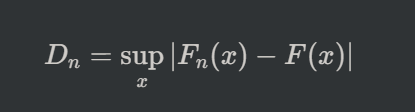

Here:
- SUPx denotes the supremum over all possible values of \( x \).
- Fn(x) is the empirical cumulative distribution function (ECDF) of the sample data.
- F(x) is the theoretical cumulative distribution function (CDF) in the one-sample test, or the ECDF of the second sample in the two-sample test.
- |Fn(x) - F(x)|  is the absolute difference between the two distribution functions.

### Python Implementation


```python
import numpy as np
from scipy import stats

# Sample data
data = np.random.normal(loc=0, scale=1, size=100)  # Random sample from a normal distribution

# One-sample K-S test (testing if 'data' follows a standard normal distribution)
D_statistic, p_value = stats.kstest(data, 'norm')
print("One-sample K-S test:")
print(f"D-statistic: {D_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Two-sample K-S test
data1 = np.random.normal(loc=0, scale=1, size=100)   # Sample from a standard normal distribution
data2 = np.random.normal(loc=0.5, scale=1.5, size=100)  # Sample from a different normal distribution

D_statistic, p_value = stats.ks_2samp(data1, data2)
print("\nTwo-sample K-S test:")
print(f"D-statistic: {D_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
```

### Explanation of the Code:
- The `stats.kstest` function is used for the one-sample K-S test. It compares the sample `data` against the CDF of a standard normal distribution (`'norm'`).
- The `stats.ks_2samp` function is used for the two-sample K-S test. It compares two datasets to see if they come from the same distribution.
- Both functions return the D-statistic and the p-value, which help determine if there are significant differences between the observed data and the specified distribution (one-sample) or between the two datasets (two-sample).

This implementation provides a direct way to apply the K-S test in real-world data analysis scenarios, allowing you to assess whether datasets conform to expected distributions or if two datasets are statistically similar.

In [ ]:
import numpy as np
from scipy import stats

# Sample data
data = np.random.normal(loc=0, scale=1, size=100)  # Random sample from a normal distribution

# One-sample K-S test (testing if 'data' follows a standard normal distribution)
D_statistic, p_value = stats.kstest(data, 'norm')
print("One-sample K-S test:")
print(f"D-statistic: {D_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Two-sample K-S test
data1 = np.random.normal(loc=0, scale=1, size=100)   # Sample from a standard normal distribution
data2 = np.random.normal(loc=0.5, scale=1.5, size=100)  # Sample from a different normal distribution

D_statistic, p_value = stats.ks_2samp(data1, data2)
print("\nTwo-sample K-S test:")
print(f"D-statistic: {D_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

One-sample K-S test:
D-statistic: 0.1056
P-value: 0.2003

Two-sample K-S test:
D-statistic: 0.2700
P-value: 0.0013


The one-sample K-S test results suggest that your sample data do not significantly deviate from a standard normal distribution.

The two-sample K-S test results indicate that there is a significant difference between the distributions of the two samples, suggesting they do not come from the same distribution.